### import necessary libararies

In [2]:
# import necessary libararies
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Loading

In [3]:
# loading train,test and validation data
train_dir = 'output/train'
train_Uninfected_dir = 'output/train/Uninfected'
train_Parasitized_dir = 'output/train/Parasitized'
test_dir = 'output/test'
test_Uninfected_dir = 'output/test/Uninfected'
test_Parasitized_dir = 'output/test/Parasitized'
valid_dir = 'output/val'
valid_Uninfected_dir = 'output/val/Uninfected'
valid_Parasitized_dir = 'output/val/Parasitized'

In [4]:
num_Uninfected_train = len(os.listdir(train_Uninfected_dir))
num_Parasitized_train = len(os.listdir(train_Parasitized_dir))
num_Uninfected_validaition = len(os.listdir(valid_Uninfected_dir))
num_Parasitized_validation= len(os.listdir(valid_Parasitized_dir))
num_Uninfected_test = len(os.listdir(test_Uninfected_dir))
num_Parasitized_test= len(os.listdir(test_Parasitized_dir))

### print the data count in each folder

In [5]:
# print the data count in each folder
print("Total Training Uninfected Images",num_Uninfected_train)
print("Total Training Parasitized Images",num_Parasitized_train)
print("--")
print("Total validation Uninfected Images",num_Uninfected_validaition)
print("Total validation Parasitized Images",num_Parasitized_validation)
print("--")
print("Total Test Uninfected Images", num_Uninfected_test)
print("Total Test Parasitized Images",num_Parasitized_test)
total_train = num_Uninfected_train+num_Parasitized_train
total_validation = num_Uninfected_validaition+num_Parasitized_validation
total_test = num_Uninfected_test+num_Parasitized_test
print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)
print("--")
print("Total Testing Images",total_test)

Total Training Uninfected Images 8268
Total Training Parasitized Images 8268
--
Total validation Uninfected Images 4134
Total validation Parasitized Images 4134
--
Total Test Uninfected Images 1378
Total Test Parasitized Images 1378
Total Training Images 16536
--
Total Validation Images 8268
--
Total Testing Images 2756


### declaring image shape and batch size

In [6]:
# declaring image shape and batch size
IMG_SHAPE  = 240
batch_size = 64

### Data Preprocessing and augmentation

In [7]:
# Data Preprocessing and augmentation
image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
directory = train_dir,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'binary')
image_generator_validation = ImageDataGenerator(rescale=1./255)
val_data_gen = image_generator_validation.flow_from_directory(batch_size=batch_size,
directory=valid_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
directory=test_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')

Found 16534 images belonging to 2 classes.
Found 8268 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [8]:
train_data_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

## cnn model

In [9]:
#intialize the cnn model
classifier = tf.keras.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation = tf.nn.relu,input_shape=(IMG_SHAPE,IMG_SHAPE, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(512,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = tf.nn.relu),
tf.keras.layers.Dense(2,activation = tf.nn.sigmoid)
])

In [10]:
classifier.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

### training the mode

In [12]:
# training the model
history_classifier = classifier.fit(train_data_gen,
steps_per_epoch=(total_train//batch_size),
epochs = 5,
validation_data=val_data_gen,
validation_steps=(total_validation//batch_size),
batch_size = batch_size,
verbose = 1)

Epoch 1/5
516/516 [==============================] - 262s 508ms/step - loss: 0.7254 - acc: 0.4958 - val_loss: 0.6932 - val_acc: 0.5002
Epoch 2/5
516/516 [==============================] - 261s 505ms/step - loss: 0.5012 - acc: 0.7706 - val_loss: 0.3641 - val_acc: 0.9089
Epoch 3/5
516/516 [==============================] - 390s 756ms/step - loss: 0.2552 - acc: 0.9357 - val_loss: 0.2137 - val_acc: 0.9400
Epoch 4/5
516/516 [==============================] - 380s 736ms/step - loss: 0.2084 - acc: 0.9479 - val_loss: 0.2141 - val_acc: 0.9480
Epoch 5/5
516/516 [==============================] - 242s 469ms/step - loss: 0.1966 - acc: 0.9542 - val_loss: 0.2041 - val_acc: 0.9545


In [13]:
# evaluate the model
results = classifier.evaluate(test_data_gen,batch_size=batch_size)
print("test_loss, test accuracy",results)

87/87 [==============================] - 9s 101ms/step - loss: 0.2047 - acc: 0.9546
test_loss, test accuracy [0.20470520853996277, 0.9546444416046143]


In [14]:
# model saving
classifier.save("classification.h5")

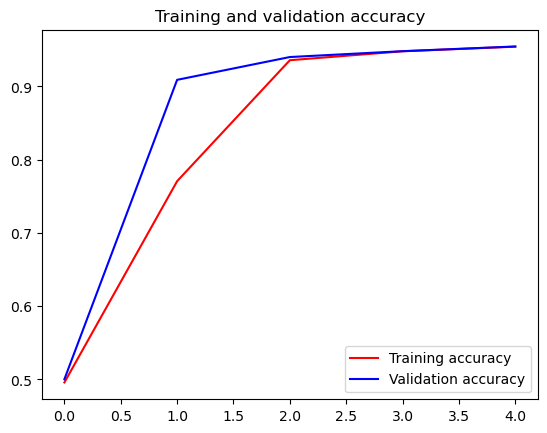

<Figure size 640x480 with 0 Axes>

In [15]:
#plot graph bw training accuracy and validation accuracy
import matplotlib.pyplot as plt
acc = history_classifier.history['acc']
val_acc = history_classifier.history['val_acc']
loss = history_classifier.history['loss']
val_loss = history_classifier.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

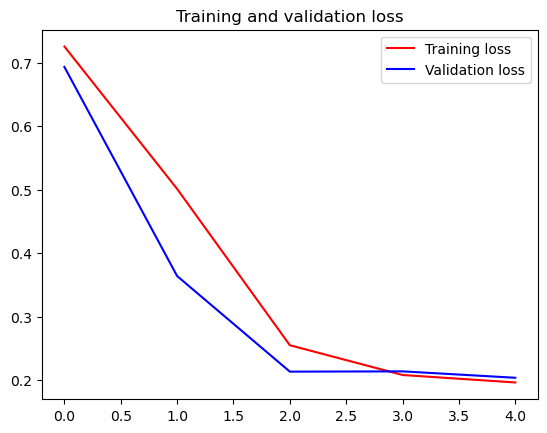

<Figure size 640x480 with 0 Axes>

In [16]:
#plot graph bw training loss and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Get the ground truth labels for the test data
test_labels = train_data_gen.classes

In [35]:
# Use the trained model to generate predictions for the test data
predictions = classifier.predict(train_data_gen, steps=(total_train//batch_size), verbose=1)

516/516 [==============================] - 93s 181ms/step


In [36]:
import numpy as np
# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

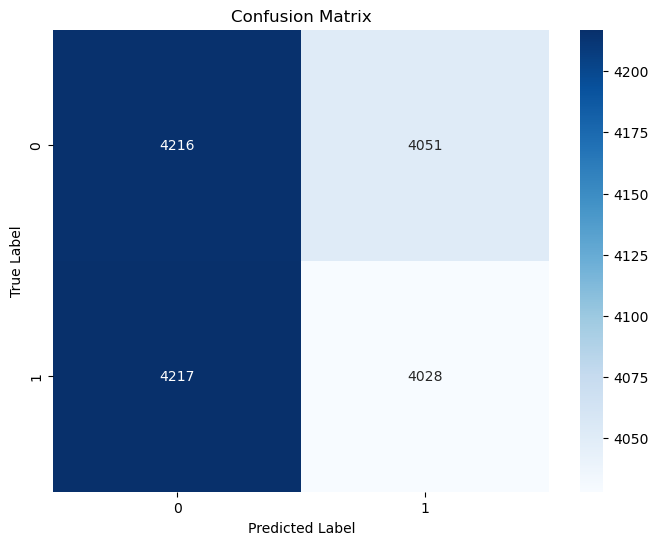

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(test_labels[0:16512], predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [41]:
report = classification_report(test_labels[0:16512], predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      8267
           1       0.50      0.49      0.49      8245

    accuracy                           0.50     16512
   macro avg       0.50      0.50      0.50     16512
weighted avg       0.50      0.50      0.50     16512

